In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Loading the Data

In [2]:
raw_data=pd.read_csv('Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
data=raw_data.copy()
data['Admitted']=data['Admitted'].map({'Yes':1,'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [4]:
y=data['Admitted']
x1=data['SAT']

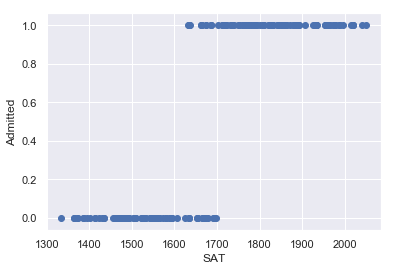

In [5]:
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

### Ploting a Linear Regression


d:\anaconda\envs\black_flag\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


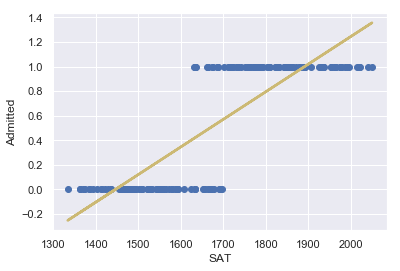

In [6]:
x=sm.add_constant(x1)
reg_lin=sm.OLS(y,x)
results_lin=reg_lin.fit()

plt.scatter(x1,y,color='C0')
y_hat=x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

##### linear regression doesnt fits the data properly, so we need to use non-linear regression approaches for fitting this data. And our data's output is bounded between 0&1, still we see the line going out of bound

### Plot with Logistic Regression

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


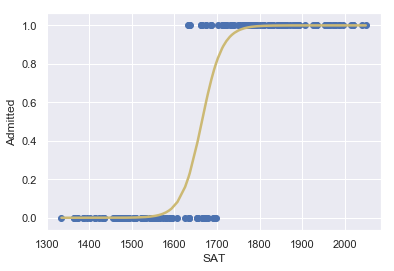

In [10]:
reg_log=sm.Logit(y,x)
results_log=reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

f_sorted =np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted =np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.plot(x_sorted,f_sorted,lw=2.5,color='C8')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

## Creating a Logistic Regression Model

#### Declaring the independent and dependent variables

In [11]:
y= data['Admitted']
x1=data['SAT']

In [12]:
x=sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log=reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [14]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Dec 2019   Pseudo R-squ.:                  0.7992
Time:                        12:39:58   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""